In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
X=iris.data
y=iris.target

In [ ]:
X_scaled=StandardScaler().fit_transform(X)

In [ ]:
X.shape

(150, 4)

**Apply PCA and visualize Scree plot**

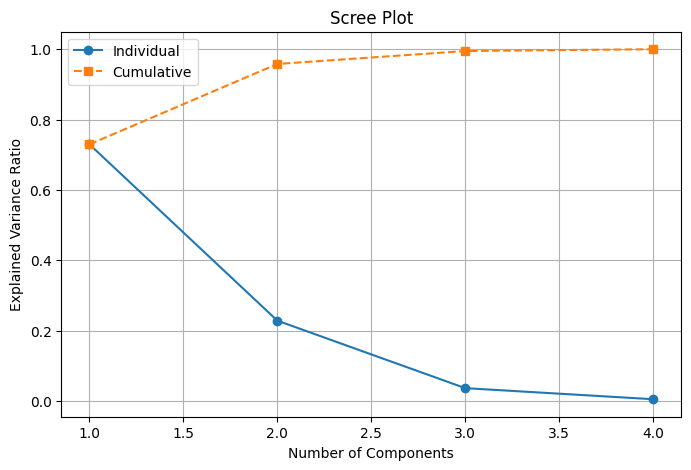

In [ ]:
pca = PCA()
pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    'o-',
    label='Individual'
)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    's--',
    label='Cumulative'
)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()


**Choose number of components (95% variance)**

In [ ]:
pca_95=PCA(n_components=0.95)
X_reduced=pca_95.fit_transform(X_scaled)

print("Original shape:",X.shape)
print("Reduced shape:",X_reduced.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


**Visualize top 2 components**

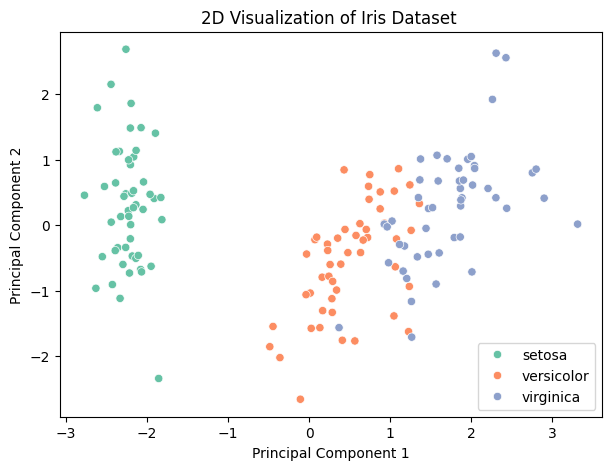

In [ ]:
pca_2d=PCA(n_components=2)
X_2d=pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_2d[:,0],y=X_2d[:,1],hue=iris.target_names[y],palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Iris Dataset ')
plt.show()